<h1>VIT Smartbridge Externship Assignment 3</h1>
<p> - Soma Anirudh 21BCE5537 VIT Chennai</p>

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [161]:
df=pd.read_csv("penguins_size.csv")
sns.set_theme()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [5]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [143]:
df["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [29]:
df["sex"].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

Univariate Analysis

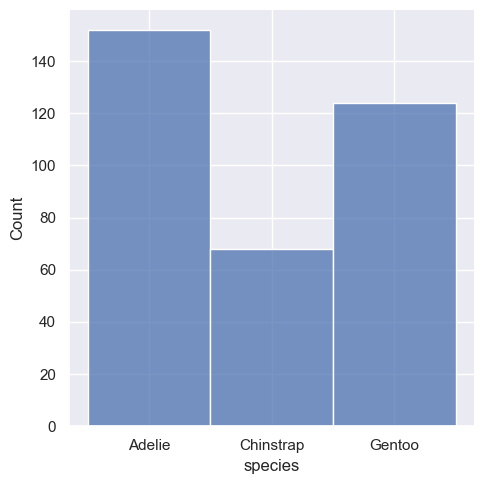

In [71]:
sns.displot(df["species"])

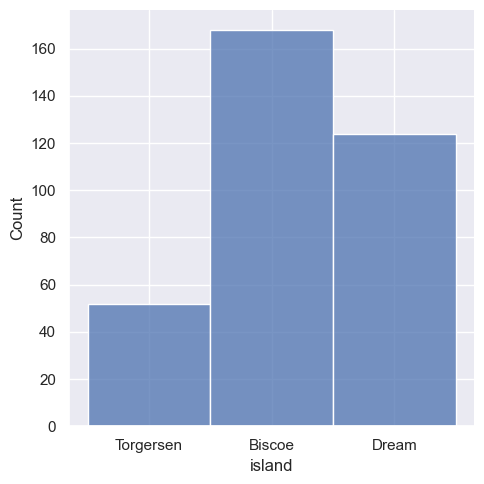

In [72]:
sns.displot(df["island"])

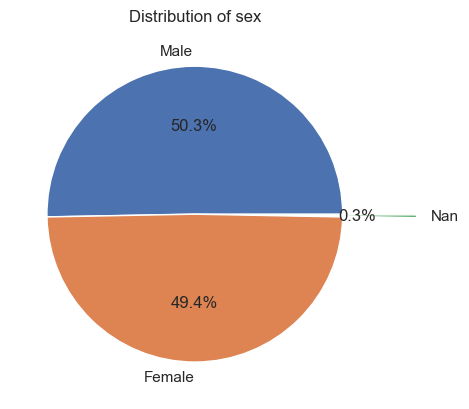

In [73]:
plt.pie(df["sex"].value_counts(),[0.001,0,0.5],labels = ["Male","Female","Nan"],autopct ='%1.1f%%');
plt.title("Distribution of sex");

Bivariate analysis

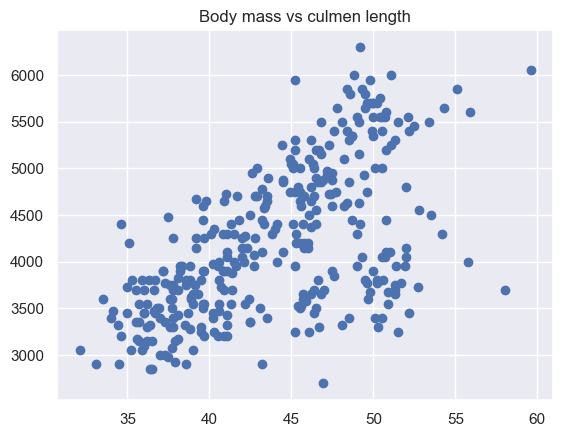

In [74]:
plt.scatter(x=df["culmen_length_mm"],y=df["body_mass_g"])
plt.title("Body mass vs culmen length");

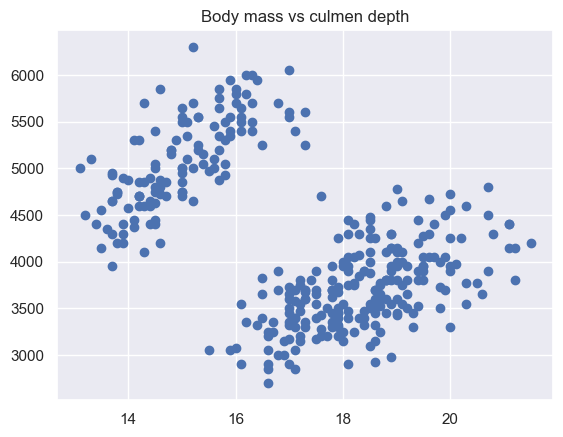

In [75]:
plt.scatter(x=df["culmen_depth_mm"],y=df["body_mass_g"])
plt.title("Body mass vs culmen depth");

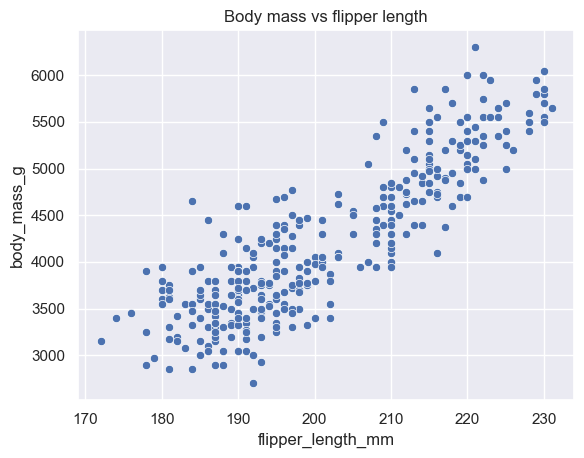

In [76]:
sns.scatterplot(x=df["flipper_length_mm"],y=df["body_mass_g"])
plt.title("Body mass vs flipper length");

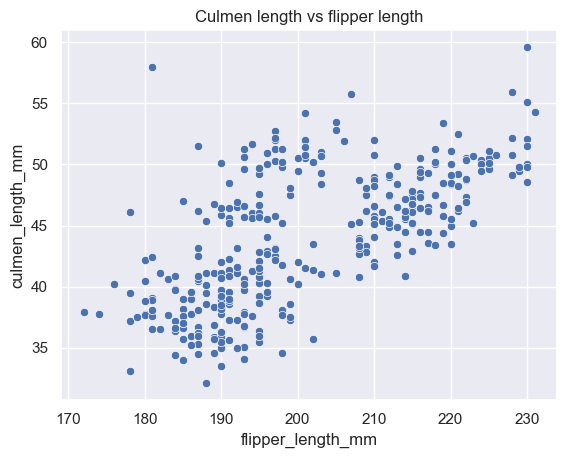

In [77]:
sns.scatterplot(x=df["flipper_length_mm"],y=df["culmen_length_mm"])
plt.title("Culmen length vs flipper length");

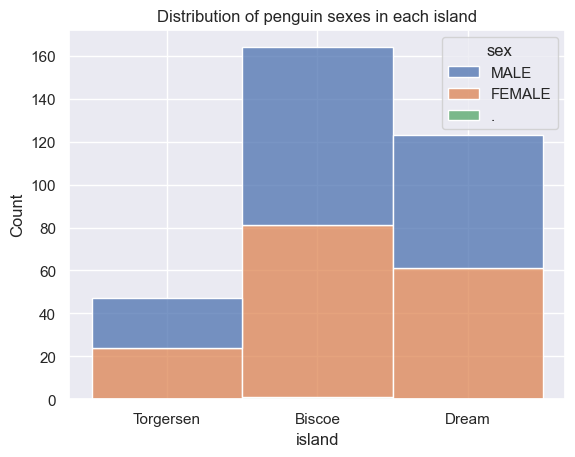

In [78]:
sns.histplot(data=df,x=df["island"],hue=df["sex"],multiple="stack")
plt.title("Distribution of penguin sexes in each island");

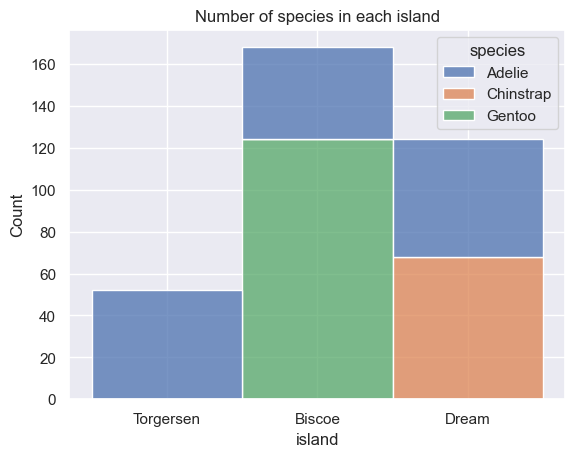

In [79]:
sns.histplot(data=df,x=df["island"],hue=df["species"],multiple="stack")
plt.title("Number of species in each island");

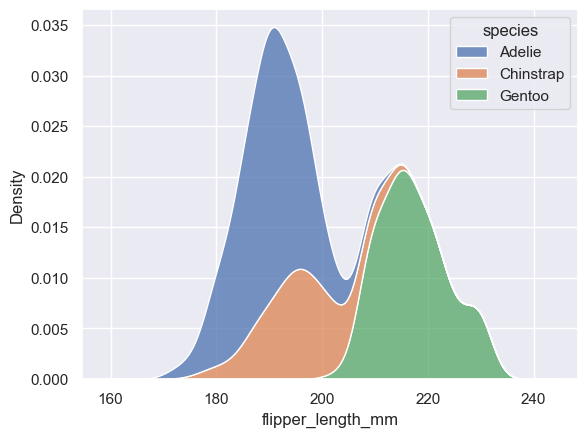

In [81]:
sns.kdeplot(data=df, x="flipper_length_mm", hue="species", multiple="stack");

Multivariate Analysis

Text(0.5, 1.0, 'Pair Plot')

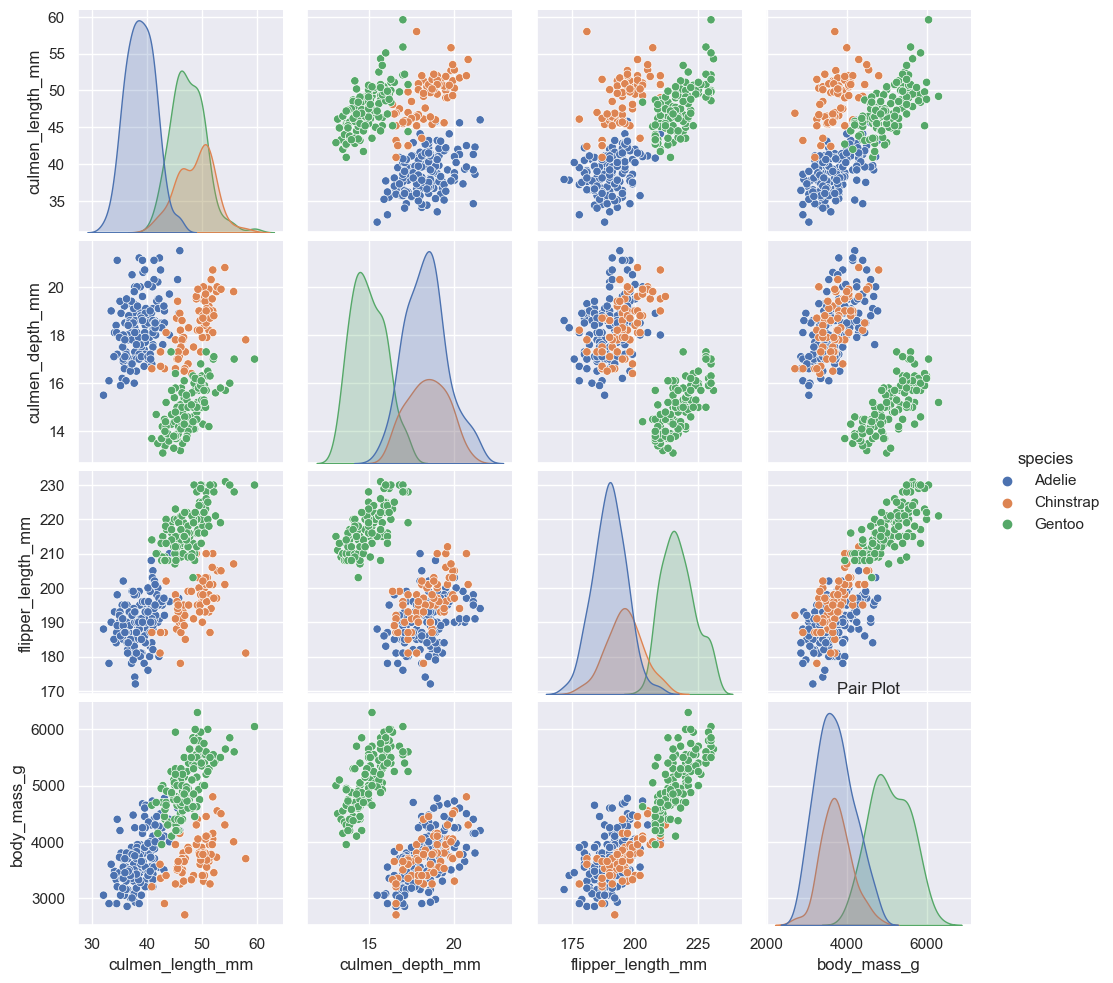

In [83]:
sns.pairplot(data=df, hue="species")
plt.title("Pair Plot")

C:\Users\urwit\AppData\Local\Temp\ipykernel_25008\3991718235.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr();


<Axes: >

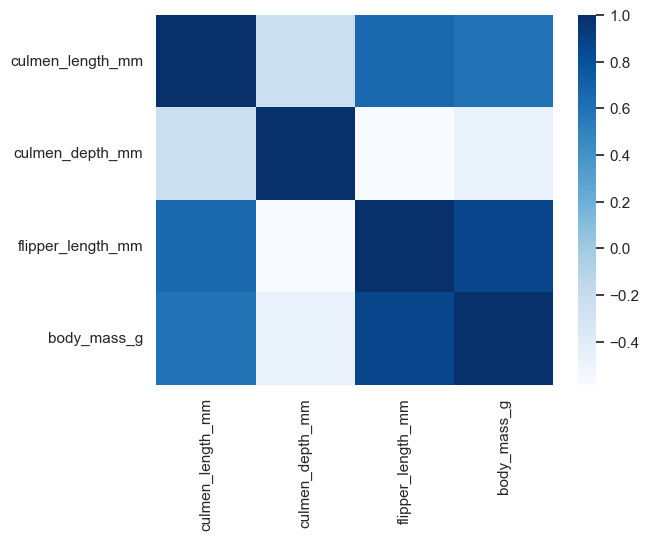

In [85]:
corr=df.corr();
sns.heatmap(corr,cmap="Blues")

Descriptive Statisitcs

In [86]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Dealing with null values

In [144]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [162]:
df["culmen_length_mm"].fillna(df["culmen_length_mm"].median(),inplace=True)
df["culmen_depth_mm"].fillna(df["culmen_depth_mm"].median(),inplace=True)
df["body_mass_g"].fillna(df["body_mass_g"].median(),inplace=True)
df["flipper_length_mm"].fillna(df["flipper_length_mm"].median(),inplace=True)
df["sex"].fillna(df["sex"].mode()[0],inplace=True)
df["sex"] = np.where(df["sex"]==".",df["sex"].mode(),df['sex'])

Outlier detection

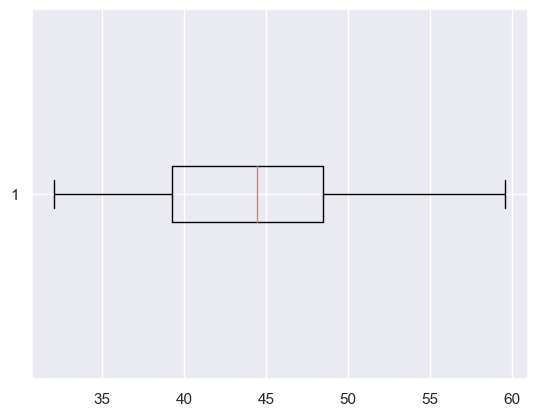

In [147]:
plt.boxplot(df["culmen_length_mm"],vert=False);
#No outliers

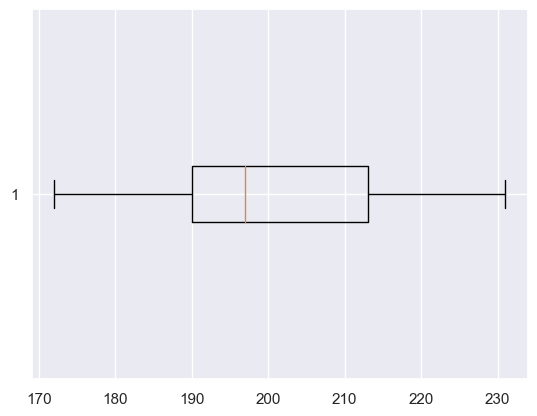

In [148]:
plt.boxplot(df["flipper_length_mm"],vert=False);
#No outliers

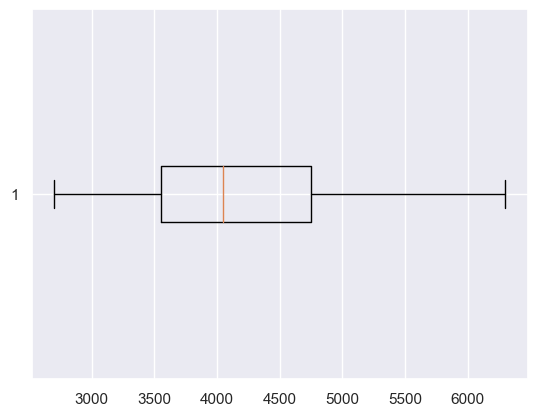

In [133]:
plt.boxplot(df["body_mass_g"],vert=False);
#No outliers

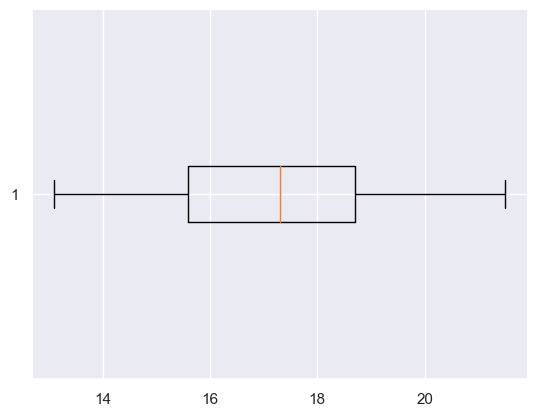

In [134]:
plt.boxplot(df["culmen_depth_mm"],vert=False);
#No outliers

Categorical Encoding

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [163]:
#Label encoding for sex
from sklearn.preprocessing import LabelEncoder   
l = LabelEncoder()
df["sex"] = l.fit_transform(df.sex)
df["species"] = l.fit_transform(df.species)
#OHE for island and species
df=pd.get_dummies(df,columns=["island"])

In [164]:
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0,39.10,18.7,181.0,3750.0,1,0,0,1
1,0,39.50,17.4,186.0,3800.0,0,0,0,1
2,0,40.30,18.0,195.0,3250.0,0,0,0,1
3,0,44.45,17.3,197.0,4050.0,1,0,0,1
4,0,36.70,19.3,193.0,3450.0,0,0,0,1


Correlation between independant variables and target vector

In [172]:
df.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
island_Biscoe        0.610710
sex                  0.010240
island_Dream        -0.311589
island_Torgersen    -0.434574
culmen_depth_mm     -0.741282
Name: species, dtype: float64

Splitting the data

In [174]:
y=df["species"] #Target Vector
X=df.drop(columns=["species"]) #Feature Matrix
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,39.10,18.7,181.0,3750.0,1,0,0,1
1,39.50,17.4,186.0,3800.0,0,0,0,1
2,40.30,18.0,195.0,3250.0,0,0,0,1
3,44.45,17.3,197.0,4050.0,1,0,0,1
4,36.70,19.3,193.0,3450.0,0,0,0,1
...,...,...,...,...,...,...,...,...
339,44.45,17.3,197.0,4050.0,1,1,0,0
340,46.80,14.3,215.0,4850.0,0,1,0,0
341,50.40,15.7,222.0,5750.0,1,1,0,0
342,45.20,14.8,212.0,5200.0,0,1,0,0


In [175]:
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int32

Scaling the data

In [176]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()
X_sc= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_sc.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0.254545,0.666667,0.152542,0.291667,1.0,0.0,0.0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0,0.0,0.0,1.0
2,0.298182,0.583333,0.389831,0.152778,0.0,0.0,0.0,1.0
3,0.449091,0.500000,0.423729,0.375000,1.0,0.0,0.0,1.0
4,0.167273,0.738095,0.355932,0.208333,0.0,0.0,0.0,1.0


Splitting data to training and testing data

In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sc,y,test_size=0.3,random_state=0)

Checking the shapes

In [181]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (240, 8)
X_test shape: (104, 8)
y_train shape: (240,)
y_test shape: (104,)
